### Flood Prediction
Dataset: [Flood Prediction](https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset)

Dataset Description:
Flood detection refers to identifying, monitoring, and alerting authorities or individuals about the presence or likelihood of flooding in a particular area. It involves using various technologies and methods to detect, predict, and mitigate the impacts of floods. Flood prediction is a critical area of research due to its significant impact on human life, infrastructure, and the environment.

|      Features      |      Data Type      |      Description     |
|--------------------|---------------------|----------------------|
| Monsoonnintensity  |         Int         |Higher volumes of rain during monsoons increase the probability of floods |
| TopographyDrainage |         Int         |The drainage capacity based on the region's topography. Efficient drainage can help drain rainwater and reduce the risk of floods |
|   RiverManagement  |         Int         |The quality and effectiveness of river management practices |
|   Deforestation    |         Int         |The extent of deforestation in the area |
|    Urbanization    |         Int         |The level of urbanization in the region |
|   ClimateChange    |         Int         |The impact of climate change on the region |
|    DamsQuality     |         Int         |The quality and maintenance status of dams |
|     Silitation     |         Int         |The extent of silitation in rivers and reservoirs |
|Agricultural Practices |      Int         |The types and sustainability of agricultural practices |
|     Encroachments  |         Int         | The degree of encroachment on flood plains and natural waterways |
|IneffectiveDisasterPreparedness|   Int    |The lack of emergency plans, warning systems, and simulations increases the negative impact of floods |
|   DrainageSystems  |         Int         |Well-maintained and adequately sized drainage systems help drain rainwater and reduce the risk of floods |
|CoastalVulnerability|         Int         |Low-lying coastal areas are prone to flooding from storm surges and sea level rise |
|     Landslides     |         Int         |Steep slopes and unstable soils are more prone to landslides |
|     Watersheds     |         Int         |Regions with more watersheds may have a higher or lower risk of flooding, depending on various factors |
|DeterioratingInfrastructure|    Int       |Clogged culverts, damaged drainage channels, and other deficient infrastructure can increase the risk of floods |
|    PopulationScore |         Int         |Densely populated areas can suffer more severe losses |
|    WetlandLoss     |         Int         |Wetlands act as natural sponges, absorbing excess water and helping to prevent floods |
| InadquatePlanning  |         Int         |Urban planning that does not consider the risk of flooding increases the vulnerability of communities |
| PoliticalFactors   |         Int         | Factors such as corruption and a lack of political will to invest drainage infrastructure can make it diffcult to manage flood risk |
| Flood Probability  |         Fload        |The overall probability of flooding in the region |

Purpose: Performing EDA(Exploratory Data Analysis) to discover insights and identify problem in data. After that, performiing Data Preprocess to make clear dataset in order to predict machine learning (Regressio) based on features.


# Preparation

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore', category=FutureWarning)

## Import Dataset

In [2]:
Df=pd.read_csv('/kaggle/input/flood-prediction-dataset/flood.csv')
Df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# EDA (Exploratory Data Analysis)

## Data Understanding

In [3]:
Df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [5]:
Df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [6]:
Sum_Duplicate=Df.duplicated().sum()
print("Sum Of Duplicate Data:", Sum_Duplicate)

Sum Of Duplicate Data: 0


In [7]:
row, col=Df.shape
print('Column of Dataframe:', col)
print('Row of Dataframe:',row)

Column of Dataframe: 21
Row of Dataframe: 50000


## Visualization

### Boxplot Visualization of Numerical Feature

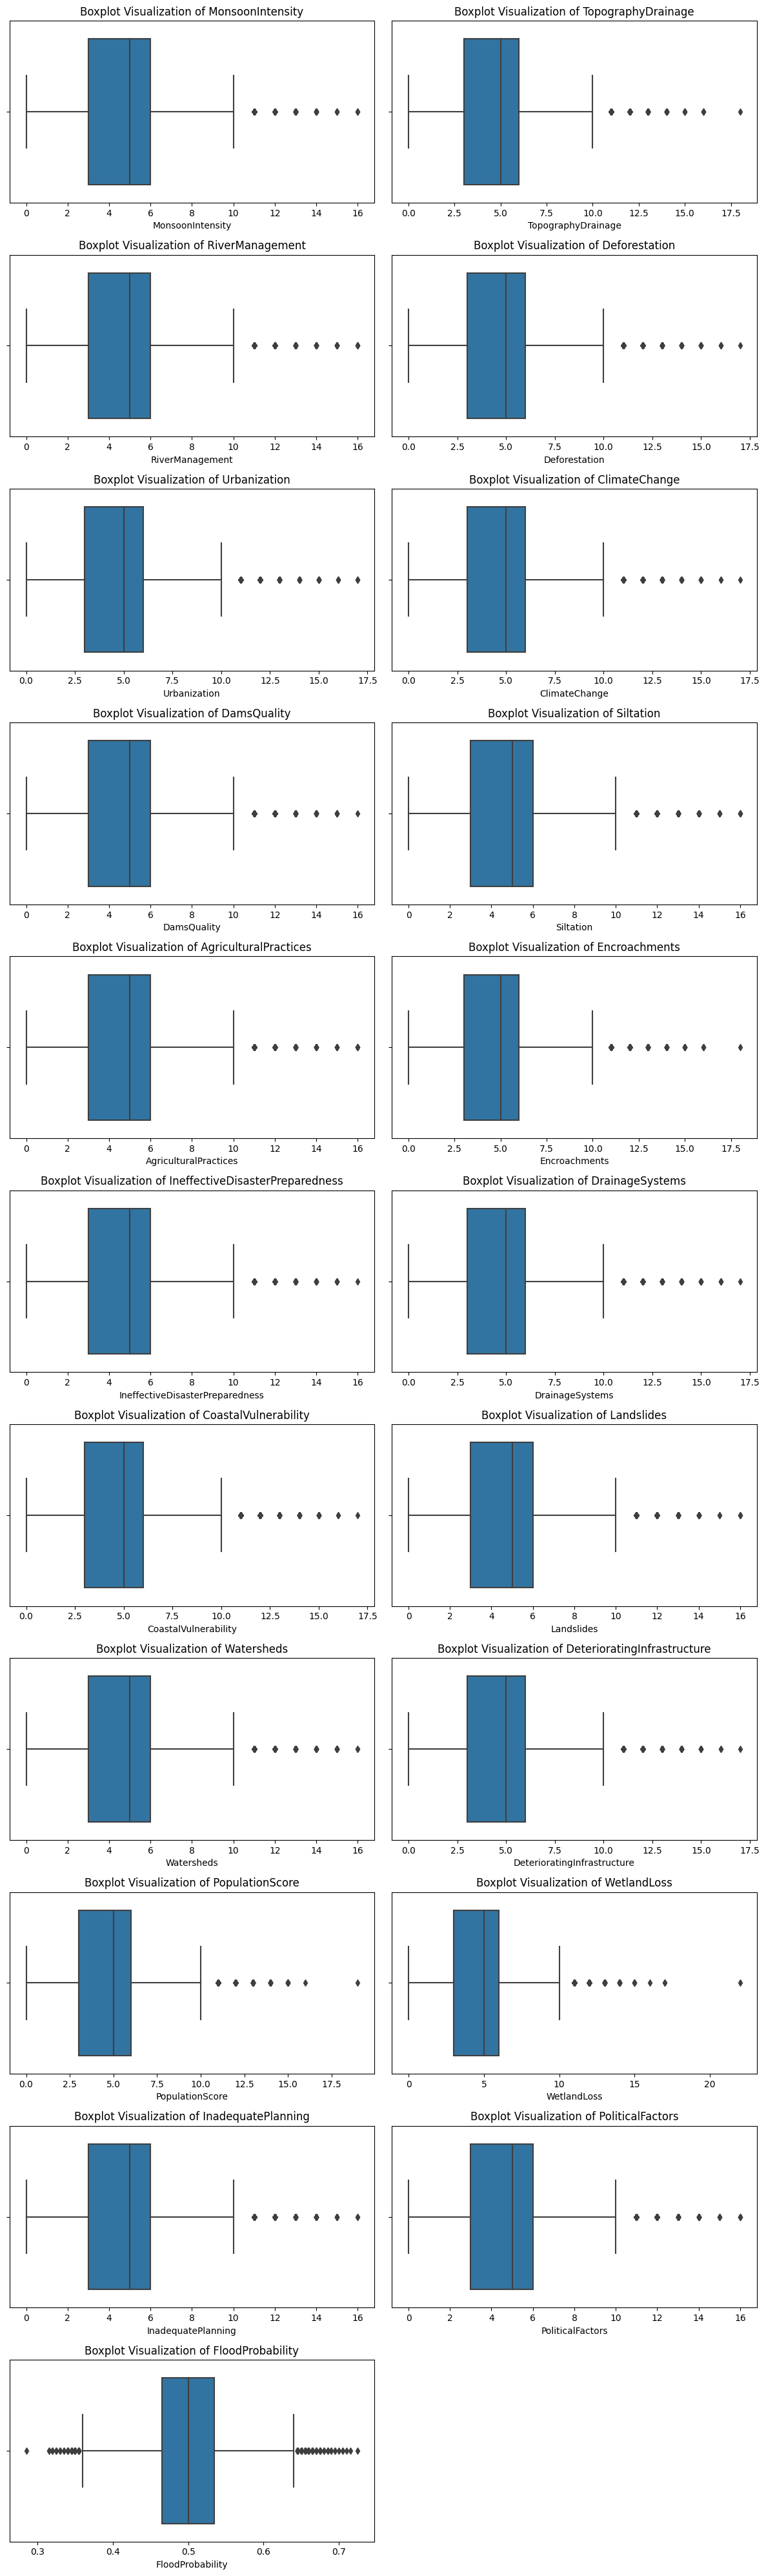

In [8]:
fig,axes=plt.subplots(11,2, figsize=(12,40))
axes=axes.flatten()

for i, feature in enumerate(Df.columns):
    sns.boxplot(data=Df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot Visualization of {feature}')
    axes[i].set_xlabel(feature)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Histogram of Numerical Feature

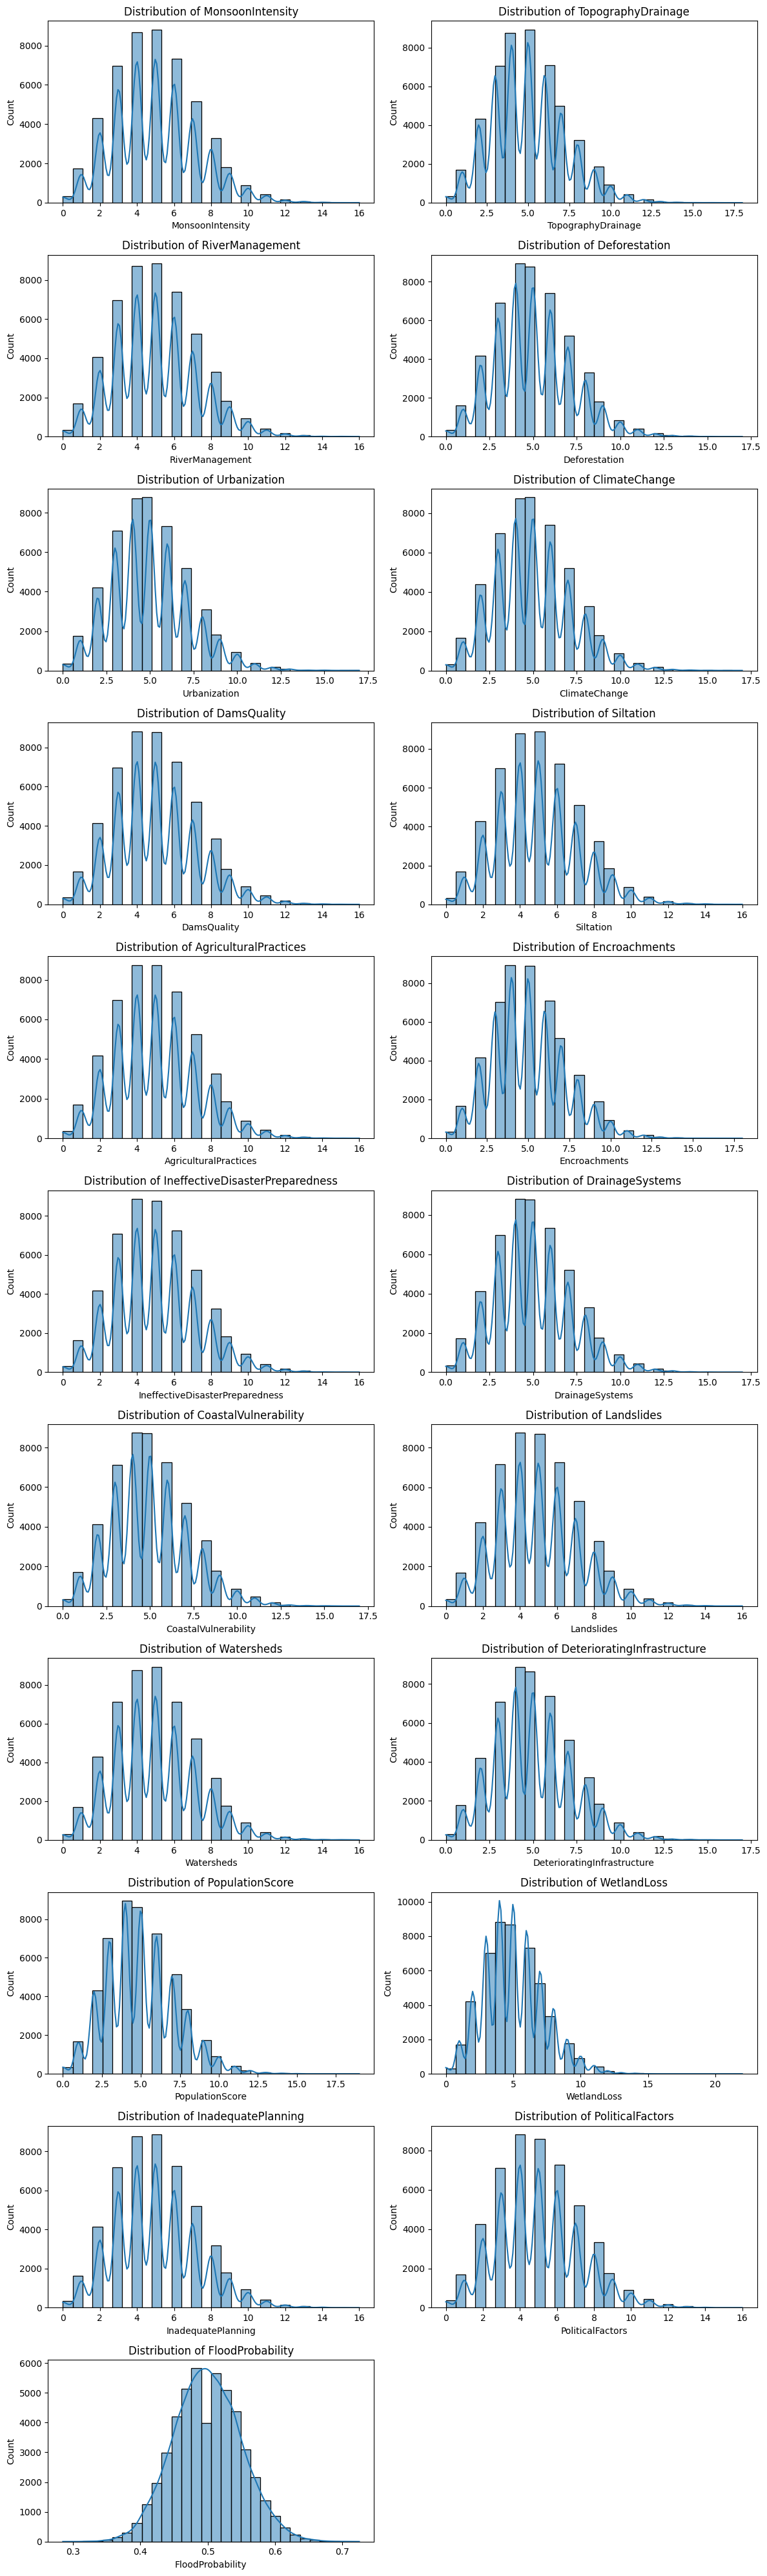

In [9]:
fig, axes=plt.subplots(11,2, figsize=(12,40))
axes=axes.flatten()

for i, feature in enumerate(Df.columns):
    sns.histplot(Df[feature], bins=30, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Heatmap of Numerical Feature

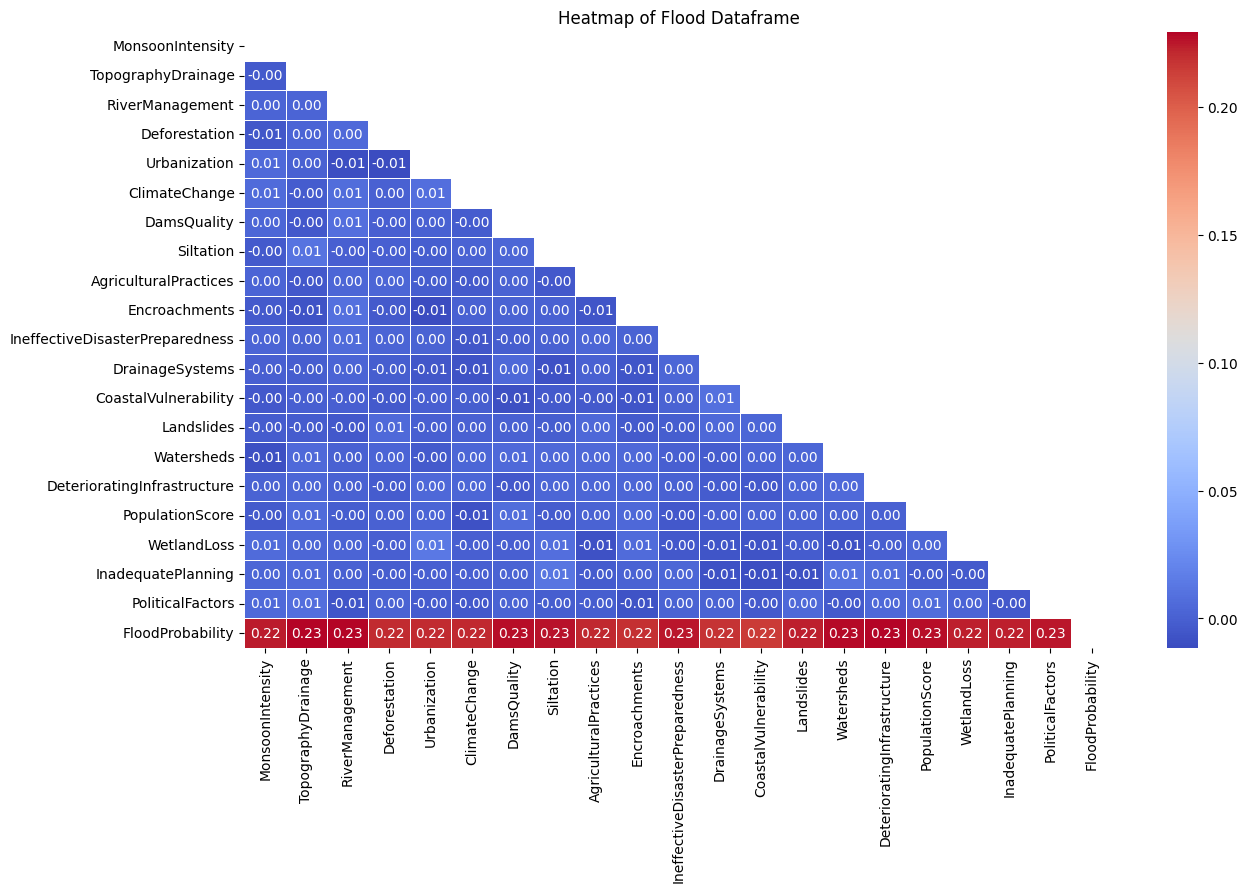

In [10]:
corr_df=Df.corr()
mask=np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=(14,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Flood Dataframe')
plt.show()

# Preprocessing

## Normalization 

In [11]:
X=Df.drop(columns='FloodProbability', axis=1)
y=Df['FloodProbability']

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

## Training Data and Test Data Split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=42)
print(f'Training Data Shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Test Data Shape: X_test: {X_test.shape}, y_test:{y_test.shape}')

Training Data Shape: X_train: (40000, 20), y_train: (40000,)
Test Data Shape: X_test: (10000, 20), y_test:(10000,)


# Modelling

## Linear Regression

In [14]:
Lr=LinearRegression().fit(X_train, y_train)
eval_LR=Lr.predict(X_test)

mae_Lr=mean_absolute_error(y_test, eval_LR)
mse_Lr=mean_squared_error(y_test, eval_LR)
r2_Lr=r2_score(y_test, eval_LR)

In [15]:
Result_df=({
    'MAE':[mae_Lr],
    'MSE':[mse_Lr],
    'R2 Score':[r2_Lr]
})

Result_df=pd.DataFrame(Result_df, index=['Linear Regression'])
Result_df

,MAE,MSE,R2 Score
Linear Regression,7.585599e-17,1.008725e-32,1.0


## Random Forest

In [16]:
Rf=RandomForestRegressor().fit(X_train, y_train)
eval_Rf=Rf.predict(X_test)

mae_rf=mean_absolute_error(y_test, eval_Rf)
mse_rf=mean_squared_error(y_test, eval_Rf)
r2_rf=r2_score(y_test, eval_Rf)

In [17]:
Result_df.loc['Random Forest']=[mae_rf, mse_rf, r2_rf]
Result_df

,MAE,MSE,R2 Score
Linear Regression,7.585599e-17,1.008725e-32,1.000000
Random Forest,2.045576e-02,6.725630e-04,0.729958


## Decision Tree

In [18]:
Dt=DecisionTreeRegressor().fit(X_train, y_train)
eval_dt=Dt.predict(X_test)

mae_dt=mean_absolute_error(y_test, eval_dt)
mse_dt=mean_squared_error(y_test, eval_dt)
r2_dt=r2_score(y_test, eval_dt)

In [19]:
Result_df.loc['Decision Tree']=[mae_dt, mse_dt, r2_dt]
Result_df

,MAE,MSE,R2 Score
Linear Regression,7.585599e-17,1.008725e-32,1.000000
Random Forest,2.045576e-02,6.725630e-04,0.729958
Decision Tree,3.732600e-02,2.224700e-03,0.106756


## SVM

In [20]:
svm=SVR().fit(X_train, y_train)
eval_svm=svm.predict(X_test)

mae_svm=mean_absolute_error(y_test, eval_svm)
mse_svm=mean_squared_error(y_test, eval_svm)
r2_svm=r2_score(y_test, eval_svm)

In [21]:
Result_df.loc['SVM']=[mae_svm, mse_svm, r2_svm]
Result_df

,MAE,MSE,R2 Score
Linear Regression,7.585599e-17,1.008725e-32,1.000000
Random Forest,2.045576e-02,6.725630e-04,0.729958
Decision Tree,3.732600e-02,2.224700e-03,0.106756
SVM,2.017998e-02,6.984723e-04,0.719555


# Hypertune Parameter

## Random Forest Hypertune Parameters

In [22]:
rf_params={
    'max_depth':[None, 5],
    'min_samples_split':[5,10],
    'min_samples_leaf':[1,2],
    'n_estimators':[50,100]
}
rf_grid=GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    scoring='r2'
)
rf_grid.fit(X_train, y_train)
print('Best Params of Random Forest:',rf_grid.best_params_)

Best Params of Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


## Decison Tree Hypertune Parameters

In [23]:
dt_params={
    'max_depth':[None, 5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':[None, 'sqrt', 'log2']
}
dt_grid=GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    scoring='r2'
)
dt_grid.fit(X_train, y_train)
print('Best Params of Decsion Tree', dt_grid.best_params_)

Best Params of Decsion Tree {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


## Random Forest (After Hypertune Parameter)

In [28]:
Rf1=RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100).fit(X_train, y_train)
eval_Rf1=Rf1.predict(X_test)

mae_rf1=mean_absolute_error(y_test, eval_Rf1)
mse_rf1=mean_squared_error(y_test,eval_Rf1)
r2_rf1=r2_score(y_test, eval_Rf1)

In [25]:
Result_df.loc['Random Forest (Hypertune Parameter)']=[mae_rf1, mse_rf1, r2_rf1]
Result_df

,MAE,MSE,R2 Score
Linear Regression,7.585599e-17,1.008725e-32,1.000000
Random Forest,2.045576e-02,6.725630e-04,0.729958
Decision Tree,3.732600e-02,2.224700e-03,0.106756
SVM,2.017998e-02,6.984723e-04,0.719555
Random Forest (Hypertune Parameter),2.047603e-02,6.737337e-04,0.729488


## Decision Tree (Hypertune Parameter)

In [26]:
Dt1=DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2).fit(X_train, y_train)
eval_dt1=Dt1.predict(X_test)

mae_dt1=mean_absolute_error(y_test, eval_dt1)
mse_dt1=mean_squared_error(y_test, eval_dt1)
r2_dt1=r2_score(y_test, eval_dt1)

In [27]:
Result_df.loc['Decision Tree (After Hypertune Parameter)']=[mae_dt1, mse_dt1, r2_dt1]
Result_df

,MAE,MSE,R2 Score
Linear Regression,7.585599e-17,1.008725e-32,1.000000
Random Forest,2.045576e-02,6.725630e-04,0.729958
Decision Tree,3.732600e-02,2.224700e-03,0.106756
SVM,2.017998e-02,6.984723e-04,0.719555
Random Forest (Hypertune Parameter),2.047603e-02,6.737337e-04,0.729488
Decision Tree (After Hypertune Parameter),3.433849e-02,1.856252e-03,0.254693


### Conclusion

- The best model is Logistic Regression to predict flood prediction because Logistic Regression have high R2 score than other model, which the features have linear releationship with Target
- After hypertune parameter in Random Forest and Decision Tree, the metrics is increase
- Decision Tree model have low metrics than other model